
Evaluating entries 0 to 99
gpt4_1_solution: 99.00% accuracy (99/100)
gemini_2_5_solution: 98.00% accuracy (98/100)
grok_4_solution: 99.00% accuracy (99/100)
claude_4_solution: 100.00% accuracy (100/100)
sonar_solution: 99.00% accuracy (99/100)
gpt4_1_solution_2: 99.00% accuracy (99/100)
claude_4_solution_2: 99.00% accuracy (99/100)

Evaluating entries 100 to 199
gpt4_1_solution: 81.00% accuracy (81/100)
gemini_2_5_solution: 60.00% accuracy (60/100)
grok_4_solution: 85.00% accuracy (85/100)
claude_4_solution: 95.00% accuracy (95/100)
sonar_solution: 71.00% accuracy (71/100)
gpt4_1_solution_2: 74.00% accuracy (74/100)
claude_4_solution_2: 96.00% accuracy (96/100)

Evaluating entries 200 to 299
gpt4_1_solution: 68.00% accuracy (68/100)
gemini_2_5_solution: 3.00% accuracy (3/100)
grok_4_solution: 36.00% accuracy (36/100)
claude_4_solution: 65.00% accuracy (65/100)
sonar_solution: 57.00% accuracy (57/100)
gpt4_1_solution_2: 65.00% accuracy (65/100)
claude_4_solution_2: 64.00% accuracy (64/

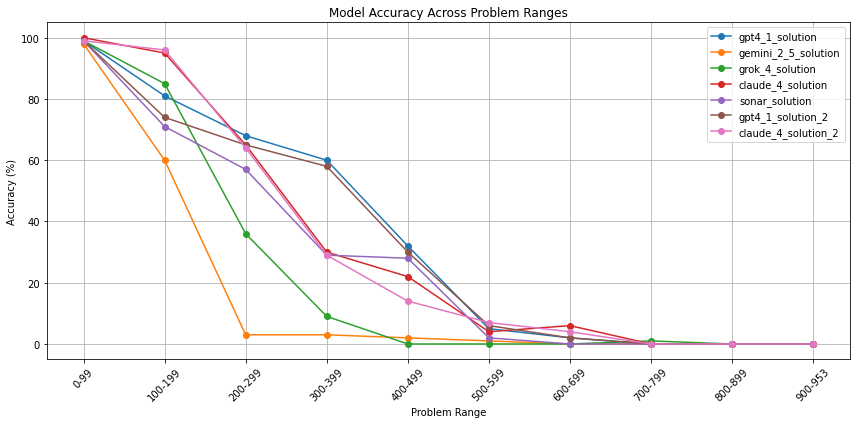

In [1]:
import json
import matplotlib.pyplot as plt

with open('dataset.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

models = ["gpt4_1_solution", "gemini_2_5_solution", "grok_4_solution", "claude_4_solution", "sonar_solution", "gpt4_1_solution_2", "claude_4_solution_2"]
stride = 100
n = len(data)
segments = [(i, min(i + stride, n)) for i in range(0, n, stride)]

accuracy_data = {model: [] for model in models}
labels = []

for start, end in segments:
    print(f"\nEvaluating entries {start} to {end - 1}")
    labels.append(f"{start}-{end-1}")
    results = {model: {"correct": 0, "total": 0} for model in models}
    for entry in data[start:end]:
        solution = entry.get("solution")
        if not solution:
            continue
        for model in models:
            model_answer = entry.get(model)
            if model_answer:
                results[model]["total"] += 1
                if model_answer == solution:
                    results[model]["correct"] += 1
    for model in models:
        correct = results[model]["correct"]
        total = results[model]["total"]
        accuracy = correct / total * 100 if total else 0
        accuracy_data[model].append(accuracy)
        print(f"{model}: {accuracy:.2f}% accuracy ({correct}/{total})")

x = range(len(labels))
plt.figure(figsize=(12, 6))
for model in models:
    plt.plot(x, accuracy_data[model], marker='o', label=model)
plt.xticks(x, labels, rotation=45)
plt.xlabel("Problem Range")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Across Problem Ranges")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()